# movie recomendation

### i will use these datasets from kaggle

TMDB:  https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

movie industry: https://www.kaggle.com/datasets/danielgrijalvas/movies

Netflix Movies and TV Shows : https://www.kaggle.com/datasets/shivamb/netflix-shows

# https://www.youtube.com/watch?v=DNIbDfrtM1g

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast


In [2]:
tmdb_credits = pd.read_csv('TMDB 5000 Movie Dataset/tmdb_5000_credits.csv')
tmdb_movies = pd.read_csv('TMDB 5000 Movie Dataset/tmdb_5000_movies.csv')

In [3]:
tmdb_credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [4]:
tmdb_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


### let's merge two table tmdb_movies and tmdb_credits on a new table named tmdb

In [5]:
tmdb = tmdb_movies.merge(tmdb_credits, on="title")

In [6]:
tmdb.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
tmdb_columns = tmdb.columns

In [8]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### for columns that types are not in exact right situation and they are in a ast node:

In [9]:
fucked_columns = ["crew", "cast", "spoken_languages", "production_companies", "keywords", "genres"]

In [10]:
for column in fucked_columns:
    print(column)

crew
cast
spoken_languages
production_companies
keywords
genres


In [11]:
def column_tolist(column_name, dataframe_name, key_name):
    """column_name: srt, dataframe_name: pandas dataframe"""
    """get a column from pandas dataframe and covnert rows to a reachable datatype"""
    """This convertion will be done with ast library and literal_eval method"""


    
    def find_right_keydict(key_name, dataframe_name, column_name, index):
        """This will search in dictionaries and find values of given keys in certain dict """
        """nested_list: this is a list which has nested dict inside"""
        
        qualified_keys = list()
        target = dataframe_name[column_name][index]
        target_list = ast.literal_eval(target)

        for target_dict in target_list:
            
            if key_name in target_dict:
                qualified_keys.append(target_dict[key_name])
        
        return qualified_keys
                    


    # result will be stored here. later on we can use this array to append a new column to a new dataframe
    output_list = list() # this list will be countain of all our values.
    for index in range(len(dataframe_name[column_name])):

        name_list = find_right_keydict(key_name=key_name, dataframe_name=dataframe_name, column_name=column_name, index=index)
        output_list.append(name_list)
        
    return output_list 

# Genre vs country

### now we will create a new dataframe based on country and Genres

In [12]:
# first create list with proper and handy format

country = column_tolist(column_name="production_countries", dataframe_name=tmdb, key_name="name")

In [13]:
country[:3]

[['United States of America', 'United Kingdom'],
 ['United States of America'],
 ['United Kingdom', 'United States of America']]

In [14]:
genres = column_tolist(column_name="genres", dataframe_name=tmdb, key_name="name")

In [15]:
genres[:3]

[['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Crime']]

### now create a dataframe using genres and country

In [16]:
genres_countries = pd.DataFrame(list(zip(genres, country)),
               columns =['genres', 'countries'])

In [17]:
genres_countries.head(2)

,genres,countries
0,"[Action, Adventure, Fantasy, Science Fiction]","[United States of America, United Kingdom]"
1,"[Adventure, Fantasy, Action]",[United States of America]


### now we have a dataframe on genres and countries
### but we want to find countries of each genre

In [18]:
# lets find unique genres
unique_genres = []

for row_genres in genres_countries["genres"]:
    
    for genre in row_genres:
        if genre not in unique_genres:
            unique_genres.append(genre)

In [19]:
unique_genres[:2]

['Action', 'Adventure']

In [20]:
# lets find unique countries
unique_countries = []

for row_counties in genres_countries["countries"]:
    
    for country in row_counties:
        if country not in unique_countries:
            unique_countries.append(country)

In [21]:
# list of unique countries
unique_countries[:5]

['United States of America',
 'United Kingdom',
 'Jamaica',
 'Bahamas',
 'Dominica']

### now we will create a dictionary in this format:

### {genre: {sample_country: times of repeating country in this genre}}

In [22]:
# set_country = {}
# for country in unique_countries:
#     set_country[country] = 0

In [23]:
main_dict = {}

for genre in unique_genres:
    main_dict[genre] = {'United States of America': 0,'United Kingdom': 0,'Jamaica': 0,
                          'Bahamas': 0,'Dominica': 0,'Czech Republic': 0,'Poland': 0,'Slovenia': 0,'New Zealand': 0,
                          'Germany': 0,'China': 0,'Canada': 0,'Italy': 0,'Japan': 0,'Malta': 0,'Australia': 0,
                          'France': 0,'Belgium': 0,'India': 0,'Netherlands': 0,'Spain': 0,'United Arab Emirates': 0,
                          'Hong Kong': 0,'Taiwan': 0,'Ireland': 0,'Morocco': 0,'Hungary': 0,'Singapore': 0,'Norway': 0,
                          'Sweden': 0,'South Africa': 0,'Russia': 0,'Romania': 0,'Mexico': 0,'Monaco': 0,
                          'Switzerland': 0,'Pakistan': 0,'Malaysia': 0,'Finland': 0,'Iceland': 0, 'Denmark': 0,
                          'Tunisia': 0,'Philippines': 0,'Bulgaria': 0,'South Korea': 0,'Brazil': 0,
                          'Peru': 0,'Luxembourg': 0,'Bosnia and Herzegovina': 0,'Kazakhstan': 0,'Portugal': 0,
                          'Aruba': 0,'Libyan Arab Jamahiriya': 0,'Serbia': 0,'Ukraine': 0,'Chile': 0,'Argentina': 0,'Panama': 0,
                          'Austria': 0,'Greece': 0,'Lithuania': 0,'Cambodia': 0,'Thailand': 0,'Slovakia': 0,
                          'Israel': 0,'Fiji': 0,'Serbia and Montenegro': 0,'Turkey': 0,
                          'Nigeria': 0,'Cyprus': 0,'Jordan': 0,'Bolivia': 0,'Ecuador': 0,'Colombia': 0,'Egypt': 0,'Bhutan': 0,
                          'Lebanon': 0,'Kyrgyz Republic': 0,'Algeria': 0,'Indonesia': 0,'Guyana': 0,'Iran': 0,'Guadaloupe': 0,
                          'Afghanistan': 0,'Angola': 0, 'Dominican Republic': 0,'Cameroon': 0,'Kenya': 0}

### now we will update our dictionary according to our genres_countries dataframe

In [24]:
def update_genre_dict(given_genre):
    """This will updata main_dict while a movie is repeat in a sepicific country and certain genre"""
    for index in range(len(genres_countries["genres"])):
        
        if given_genre in genres_countries["genres"][index]:
            
            for country in genres_countries["countries"][index]:
                main_dict[given_genre][country] = main_dict[given_genre][country] + 1


In [25]:
for genre in unique_genres:
    update_genre_dict(genre) # this loop will updata all values of main_dict 

In [26]:
genres_vs_countries = pd.DataFrame.from_dict(main_dict) # orient="index"

In [64]:
genres_vs_countries.head(1)

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
United States of America,993,689,370,462,590,1802,1088,193,448,70,1491,741,432,296,129,106,166,74,2,7


In [95]:
shot_data = genres_vs_countries.loc[(genres_vs_countries.sum(axis=1) < 30) | (genres_vs_countries.sum(axis=1) > 5000) ]
shot_data_row_lable = shot_data.index

In [96]:
valid_countries = genres_vs_countries.drop(genres_vs_countries[genres_vs_countries.index.isin(shot_data_row_lable)].index)

In [97]:
valid_countries

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
United Kingdom,178,147,67,75,109,344,206,16,56,8,164,126,50,46,47,35,26,14,7,1
Czech Republic,11,9,7,5,5,9,14,1,3,1,4,2,3,3,2,1,0,0,0,0
New Zealand,10,13,10,1,0,13,9,2,2,2,2,3,3,2,1,1,0,1,0,0
Germany,101,52,32,34,62,172,118,10,22,3,92,53,35,33,25,22,7,3,0,0
China,37,19,11,5,8,31,15,2,4,0,10,10,1,4,14,5,0,0,1,0
Canada,71,39,19,47,39,118,89,6,18,7,69,30,62,36,10,6,5,2,4,0
Italy,11,9,6,2,14,49,19,0,2,3,13,18,6,6,7,8,4,1,2,0
Japan,21,14,10,15,5,27,16,11,6,1,6,4,10,6,6,4,1,0,0,0
Australia,38,27,12,21,11,41,35,6,16,3,30,15,18,10,4,3,1,1,2,0
France,77,40,23,27,63,174,97,15,21,5,71,61,28,28,21,18,8,8,1,0


In [98]:
action_count = valid_countries["Action"]
action_country = valid_countries.index

In [123]:
# plt.figure(figsize=(20,10))

#plt.bar(genres_vs_countries.index[1:], genres_vs_countries["Action"][1:])
# plt.bar(valid_countries.index, valid_countries["Drama"], label="Drama")
# plt.bar(valid_countries.index, valid_countries["Fantasy"], label="Fantasy")
# plt.bar(valid_countries.index, valid_countries["Action"], label="Action")
# plt.bar(valid_countries.index, valid_countries["Adventure"], label="Adventure")
# plt.bar(valid_countries.index, valid_countries["Comedy"], label="Comedy")
# plt.bar(valid_countries.index, valid_countries["War"], label="War")
# plt.bar(valid_countries.index, valid_countries["Romance"], label="Romance")


# plt.legend()
# plt.xticks(rotation=90)
# plt.show()

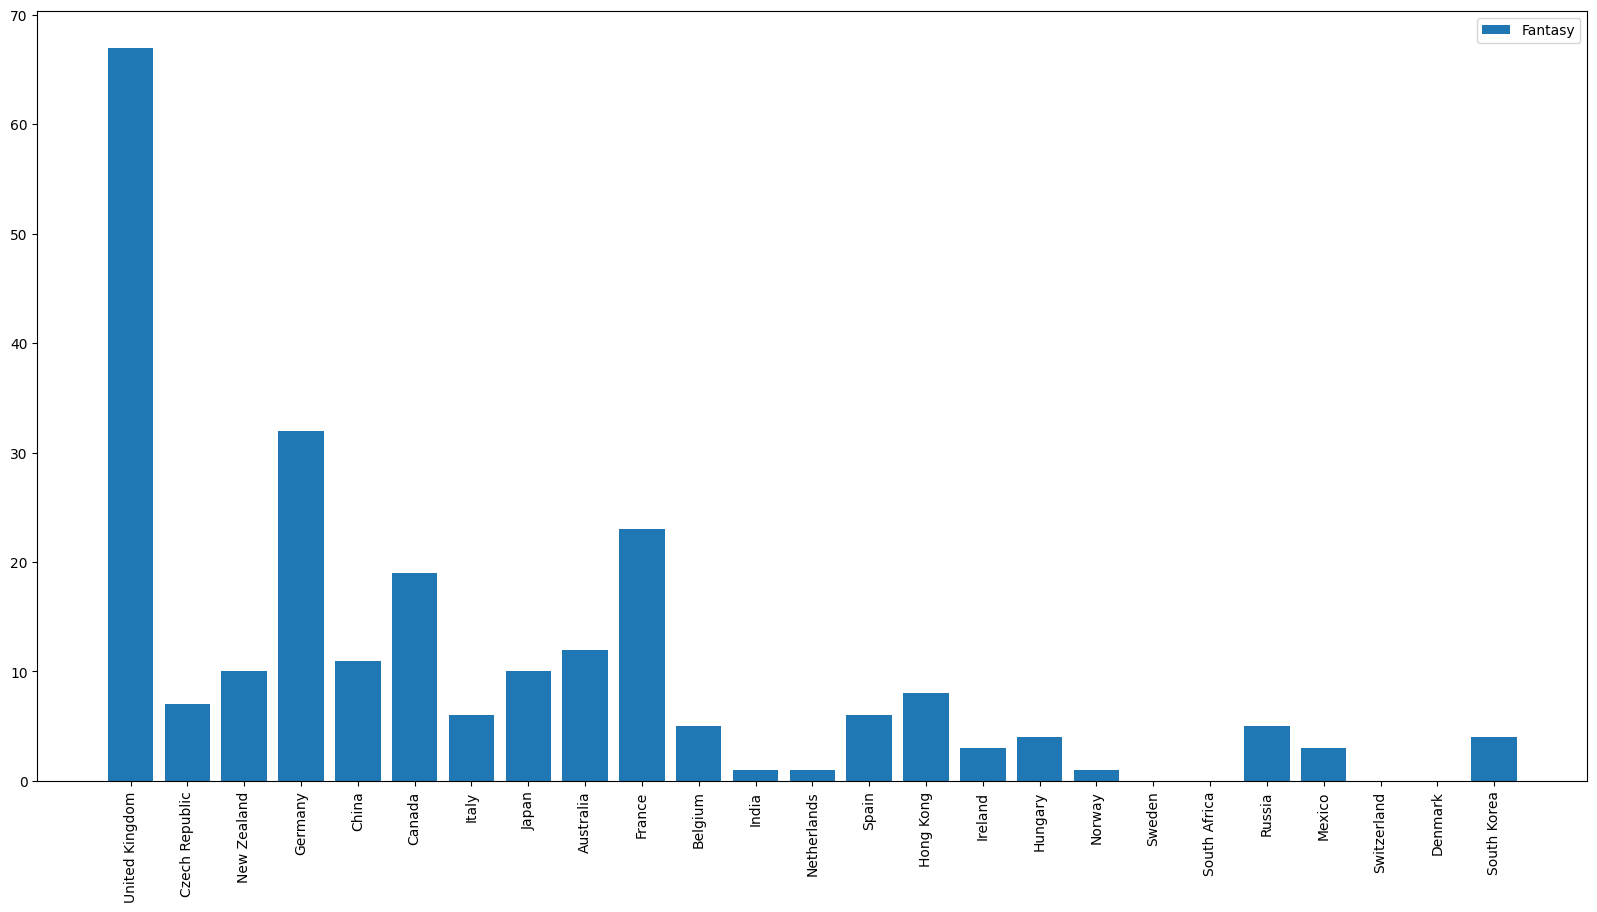

In [121]:
plt.figure(figsize=(20,10))

# plt.bar(valid_countries.index, valid_countries["Drama"], label="Drama")
plt.bar(valid_countries.index, valid_countries["Fantasy"], label="Fantasy")
# plt.bar(valid_countries.index, valid_countries["Action"], label="Action")
# plt.bar(valid_countries.index, valid_countries["Adventure"], label="Adventure")
# plt.bar(valid_countries.index, valid_countries["Comedy"], label="Comedy")
# plt.bar(valid_countries.index, valid_countries["War"], label="War")
# plt.bar(valid_countries.index, valid_countries["Romance"], label="Romance")


plt.legend()
plt.xticks(rotation=90)
plt.show()

In [130]:
tmdb["release_date"]

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4804    1992-09-04
4805    2011-12-26
4806    2013-10-13
4807    2012-05-03
4808    2005-08-05
Name: release_date, Length: 4809, dtype: object

In [126]:
tmdb.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

### relation between :


#### genres and production company


In [124]:
tmdb.head(100)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pic

In [125]:
#### genres and release_date
#### genres and budget
#### genres and language
#### genres and popularity
#### popularity and production_companies	
#### year and genre
#### budget and genre
#### budget and runtime
#### budget and popularity
##### production compani and runtime
##### production compani and pupulaorty
#### year and budget
#### production company and year

# relation between genres and production country

In [409]:
import seaborn as sns

# lets find out fantasy movies are product in which countries
